# Python Advanced Assignment 04

##  Q1. Which two operator overloading methods can you use in your classes to support iteration?

Iterator in python is an object that is used to iterate over iterable objects like lists, tuples, dicts, and sets. The iterator object is initialized using the iter() method. It uses the next() method for iteration.

iter(iterable) method that is called for the initialization of an iterator. This returns an iterator object

next ( next in Python 3) The next method returns the next value for the iterable. When we use a for loop to traverse any iterable object, internally it uses the iter() method to get an iterator object which further uses next() method to iterate over. This method raises a StopIteration to signal the end of the iteration.

How an iterator really works in python

In [33]:
iterable_value = 'deepika'
iterable_obj = iter(iterable_value)

while True:
    try:
        item = next(iterable_obj)
        print(item)
    except StopIteration:
        break

d
e
e
p
i
k
a


Below is a simple Python custom iterator that creates iterator type that iterates from 10 to a given limit. For example, if the limit is 15, then it prints 10 11 12 13 14 15. And if the limit is 5, then it prints nothing

In [34]:
class Test:

    def __init__(self, limit):
        self.limit = limit
    def __iter__(self):
        self.x = 10
        return self

    def __next__(self):

        x = self.x
        if x > self.limit:
            raise StopIteration
        self.x = x + 1;
        return x
    
for i in Test(15):
    print(i)

for i in Test(5):
    print(i)

10
11
12
13
14
15


## Q2. In what contexts do the two operator overloading methods manage printing?

You’ll find various python operators and their magic methods in the table below.

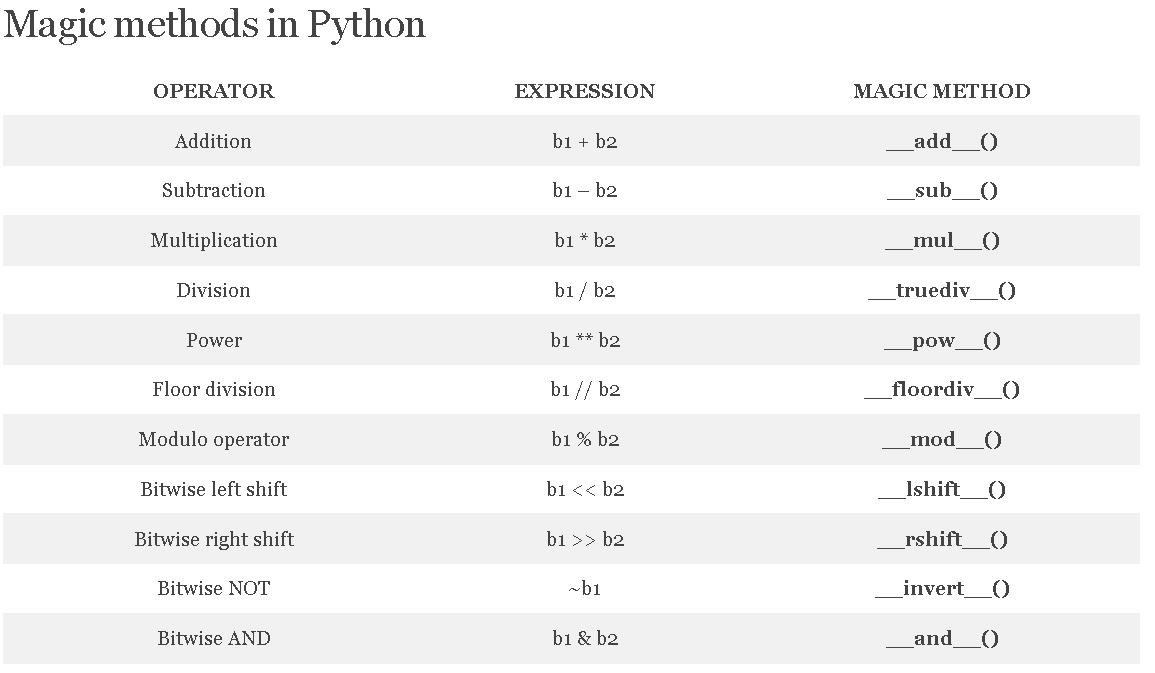

## Q3. In a class, how do you intercept slice operations?

It's because one needs to define something that is NOT done in the base-class' init , and the only possibility to obtain that is to put its execution in a derived-class' init function.

In [ ]:
class InterceptedList(list):
    def addSave(func):
        def newfunc(self, *args):
            func(self, *args)
            print ('saving')
        return newfunc

__setslice__ = addSave(list.__setslice__)
__delslice__ = addSave(list.__delslice__)
    
    
l = InterceptedList()
l.extend([1,2,3,4])


l[3:] = [5]

Python slice() function returns a slice object.

A sequence of objects of any type(string, bytes, tuple, list or range) or the object which implements getitem() and len() method then this object can be sliced using slice() method.

Syntax:

slice(stop)

slice(start, stop, step)

Parameters:

start: Starting index where the slicing of object starts.

stop: Ending index where the slicing of object stops.

step: It is an optional argument that determines the increment between each index for slicing. Return Type: Returns a sliced object containing elements in the given range only.

Note: If only one parameter is passed then start and step is considered to be None.


In [36]:
String = 'iNeuron.ai'
s1 = slice(3)
s2 = slice(1, 5, 2)

print("String slicing")
print(String[s1])
print(String[s2])

String slicing
iNe
Nu


## Q4. In a class, how do you capture in-place addition?

Python in its definition provides methods to perform inplace operations, i.e doing assignment and computation in a single statement using “operator” module. For example,

x += y is equivalent to x = operator.iadd(x, y)

Some Important Inplace operations :

iadd() :- This function is used to assign and add the current value. This operation does “a+=b” operation. Assigning is not performed in case of immutable containers, such as strings, numbers and tuples.

iconcat() :- This function is used to concat one string at end of second.

isub() :- This function is used to assign and subtract the current value. This operation does “a-=b” operation. Assigning is not performed in case of immutable containers, such as strings, numbers and tuples.

imul() :- This function is used to assign and multiply the current value. This operation does “a*=b” operation. Assigning is not performed in case of immutable containers, such as strings, numbers and tuples.

itruediv() :- This function is used to assign and divide the current value. This operation does “a/=b” operation. Assigning is not performed in case of immutable containers, such as strings, numbers and tuples.

imod() :- This function is used to assign and return remainder . This operation does “a%=b” operation. Assigning is not performed in case of immutable containers, such as strings, numbers and tuples.

## Q5. When is it appropriate to use operator overloading?

Operator overloading is mostly useful when you're making a new class that falls into an existing "Abstract Base Class" (ABC) -- indeed, many of the ABCs in standard library module collections rely on the presence of certain special methods (and special methods, one with names starting and ending with double underscores AKA "dunders", are exactly the way you perform operator overloading in Python). This provides good starting guidance.

For example, a Container class must override special method contains, i.e., the membership check operator item in container (as in, if item in container: -- don't confuse with the for statement, for item in container:, which relies on iter!-). Similarly, a Hashable must override hash, a Sized must override len, a Sequence or a Mapping must override getitem, and so forth. (Moreover, the ABCs can provide your class with mixin functionality -- e.g., both Sequence and Mapping can provide contains on the basis of your supplied getitem override, and thereby automatically make your class a Container).